# Credit Card Fraud Detection

## Import Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler

## Import Files

In [2]:
# Import the dataset
df = pd.read_csv('D:\Data Science\Projects\Credit Card Fraud Detection\Data\creditcard.csv')

In [3]:
# Check 15 random samples of the dataset
df.sample(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
134051,80626.0,-1.712365,0.464645,1.806973,-0.483911,-0.931128,1.011223,-0.868314,-0.925289,0.988718,...,1.268902,-0.820639,-0.293711,-0.327030,0.513491,1.023932,0.056766,-0.241965,82.98,0
211231,138321.0,-1.352420,-1.370796,0.881689,-1.760431,-1.443949,0.228016,-0.180014,0.622657,-0.953280,...,0.024458,-0.238632,0.758806,-0.408337,-1.050426,0.994777,-0.071685,0.038604,282.90,0
203530,134856.0,-1.545567,0.546165,1.256454,-0.449071,0.884667,-0.380553,1.916988,-1.012080,0.556597,...,-0.469643,-0.510711,-0.390657,1.092034,0.586412,-0.505809,-0.830317,-0.343015,104.19,0
157665,110232.0,-2.460430,-2.172369,4.187811,5.820266,2.182047,0.161296,-2.794314,0.581976,1.223488,...,0.150043,0.474159,0.149608,0.030488,0.189485,0.587961,-0.095825,-0.059485,0.06,0
14338,25426.0,1.125336,1.130146,-0.962975,2.675688,0.990075,-0.243318,0.316192,0.122960,-1.143343,...,-0.166737,-0.521934,-0.112376,-0.592077,0.520791,0.043354,0.015159,0.063612,3.76,1
154152,100894.0,1.923332,-0.562592,-0.162076,0.205196,-0.366333,0.747907,-1.103418,0.225319,2.385808,...,-0.085530,0.042455,0.251919,0.007153,-0.561349,0.430036,-0.048709,-0.048472,39.00,0
12082,20974.0,1.145263,-0.341335,1.040508,-0.683389,-0.868051,0.030415,-0.809441,0.149747,2.789183,...,-0.073722,0.277774,-0.020030,-0.009074,0.382682,-0.714987,0.079995,0.017729,10.85,0
92462,63941.0,1.186595,-0.399170,0.394292,-0.584110,-0.881148,-0.749268,-0.249215,-0.001279,1.809127,...,-0.003413,0.306860,-0.092133,0.425120,0.706926,-0.572375,0.074863,0.018601,12.95,0
264955,161667.0,2.079673,0.156520,-1.725421,0.404987,0.439299,-0.851522,0.181885,-0.231428,0.502014,...,-0.368748,-0.956569,0.333961,0.481163,-0.251768,0.175112,-0.062863,-0.031137,1.29,0
162049,114781.0,2.090323,-0.072568,-1.779165,-0.145660,0.750914,-0.011131,0.064118,-0.095754,0.472069,...,0.271511,0.930115,-0.104280,-0.170592,0.439001,-0.415053,0.005176,-0.065236,1.00,0


In [4]:
# Check the columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Looks like there isn't any missing values in the dataset.

## Exploratory Data Analysis

In [5]:
# Check the summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The author of the dataset mentioned that V1, V2, ..., V28 are features resulting from PCA done before. It is reflected in the result above that the values of V1, V2, ..., V28 are on a similar scale.

In [6]:
def distribution_check(feature):
    '''
    This function will output the histogram and boxplot of a feature.
    '''

    # Create the figure
    fig, ax = plt.subplots(1, 2, figsize=(12,6))

    # Plot the histogram 
    sns.histplot(df[feature], kde=True, ax=ax[0])
    ax[0].set_title(f'{feature} Distribution (Histogram)')
    ax[0].grid(True)
    ax[0].set_axisbelow(True)

    # Plot the boxplot
    sns.boxplot(x=df[feature], ax=ax[1])
    ax[1].set_title(f'{feature} Distribution (Boxplot)')
    ax[1].grid(True)
    ax[1].set_axisbelow(True)

    # Show the plots
    plt.tight_layout()
    plt.show()

## Check the Features' Distributions

### Check the Distribution of V1

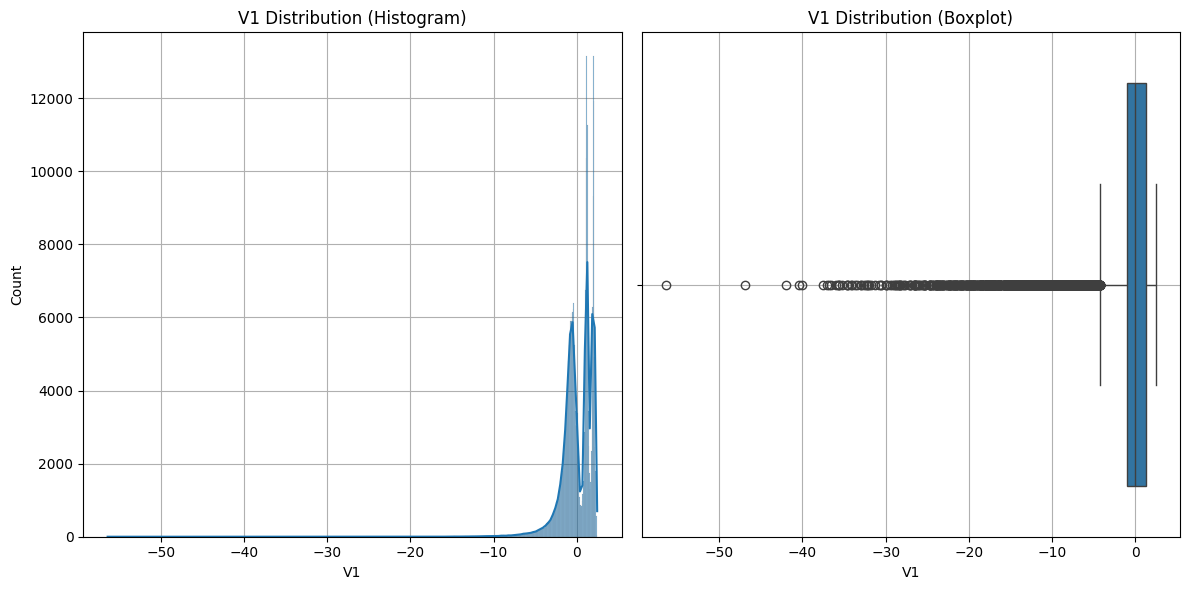

In [7]:
distribution_check('V1')

### Check the Distribution of V2

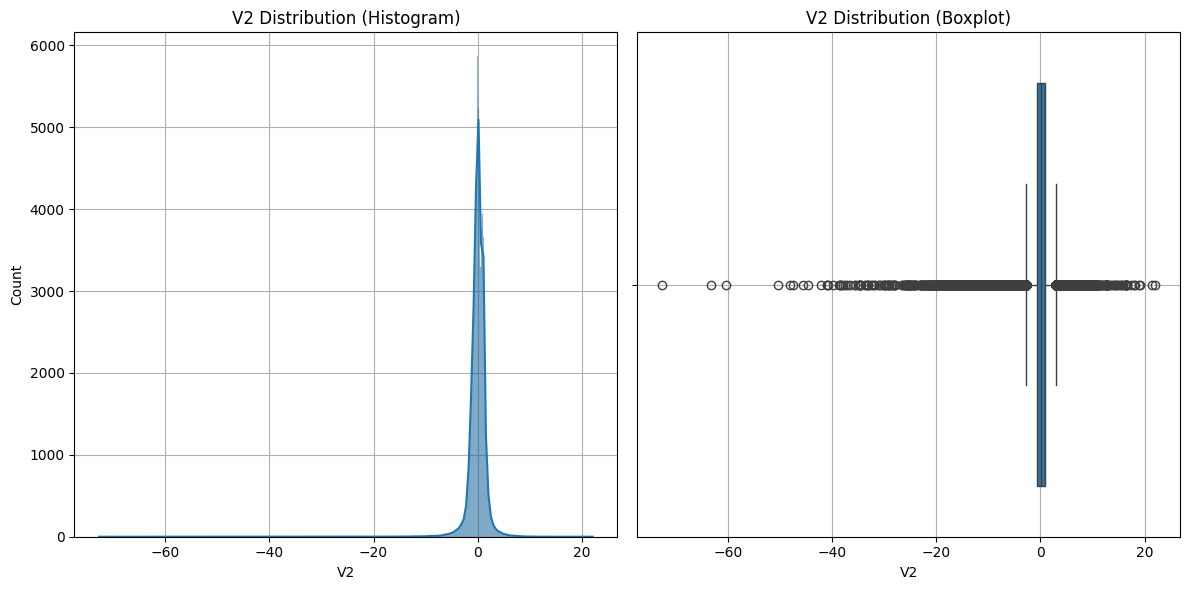

In [8]:
distribution_check('V2')

### Check the Distribution of V3

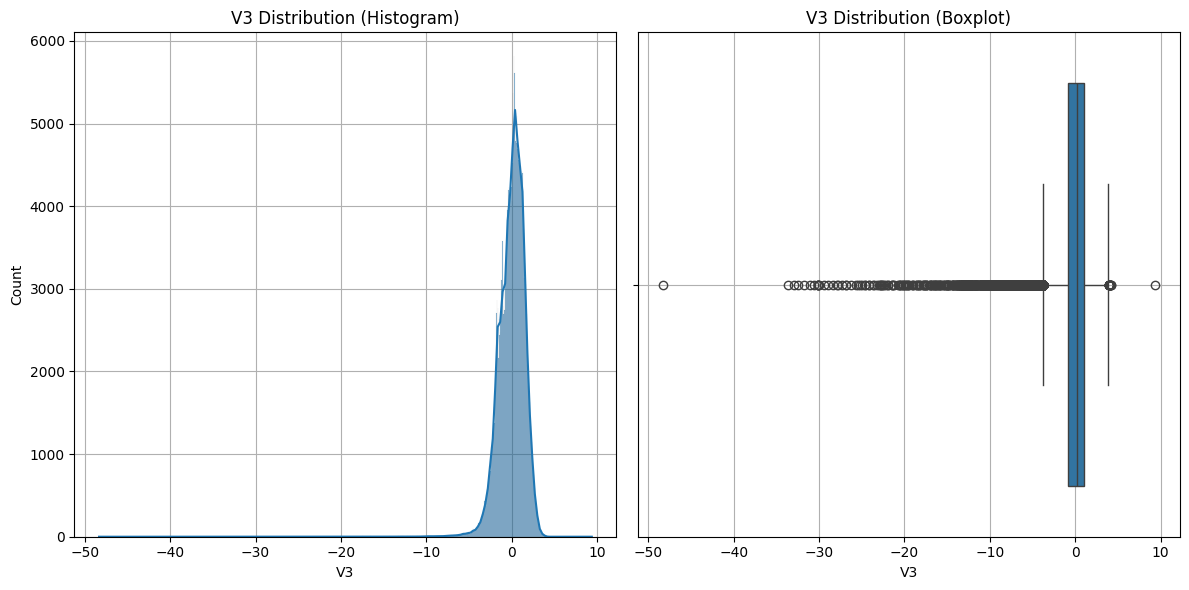

In [9]:
distribution_check('V3')

### Check the Distribution of V4

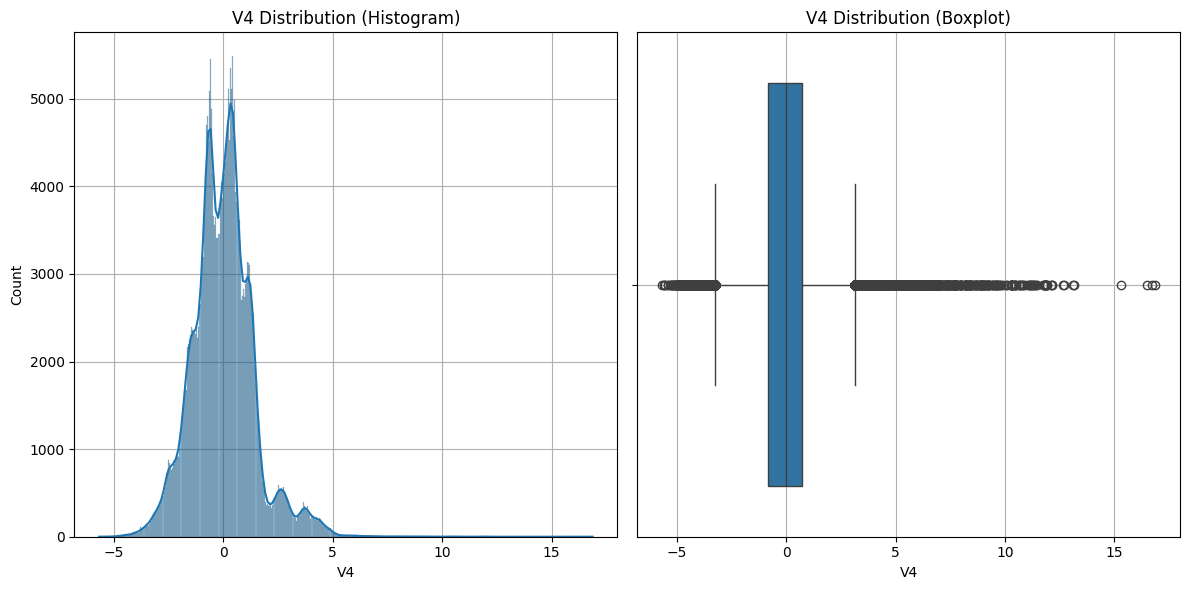

In [10]:
distribution_check('V4')

### Check the Distribution of V5

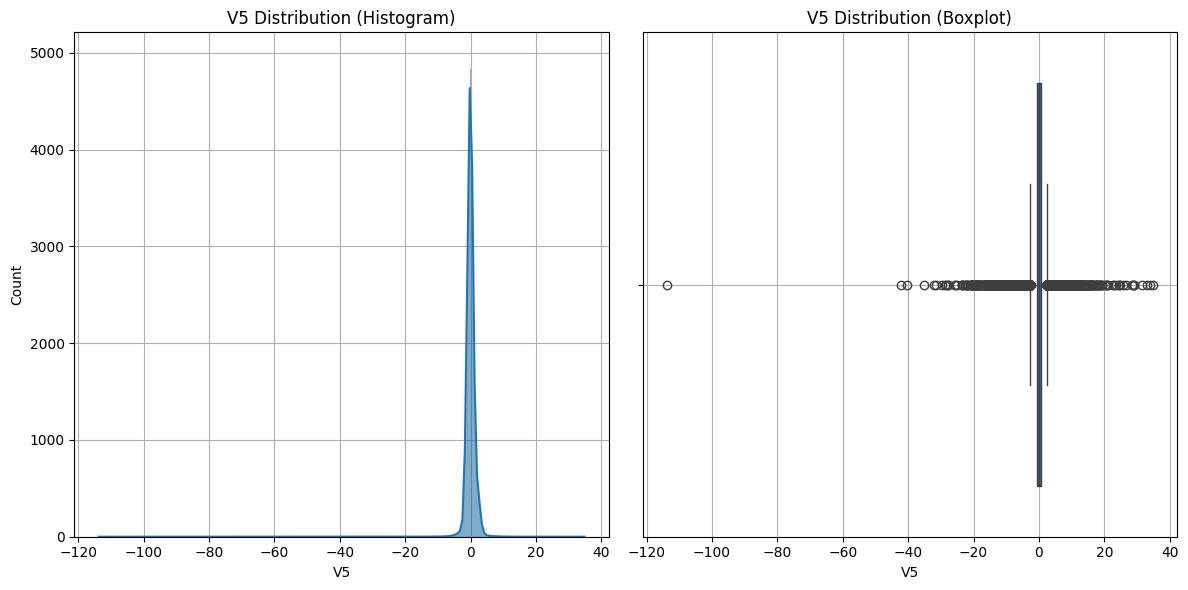

In [11]:
distribution_check('V5')

### Check the Distribution of V6

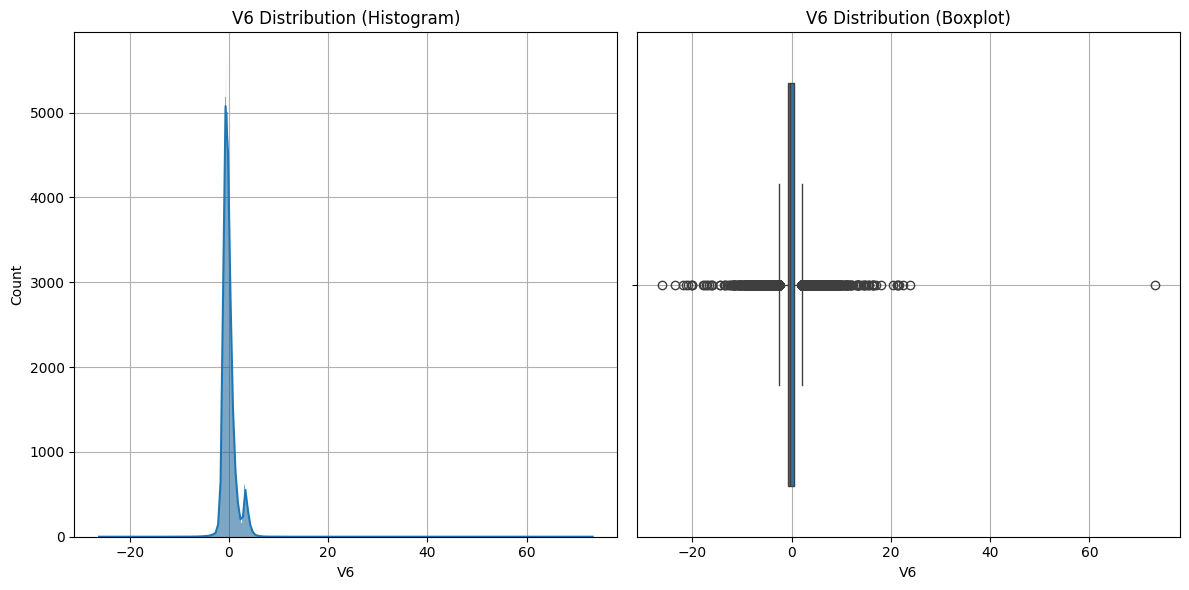

In [12]:
distribution_check('V6')

### Check the Distribution of V7

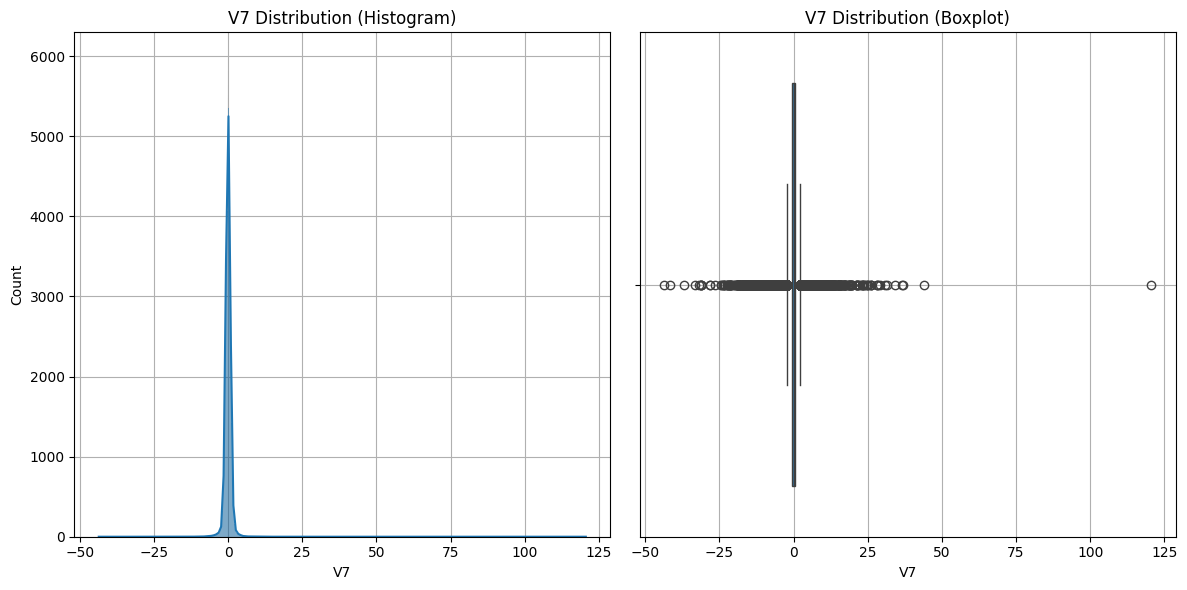

In [13]:
distribution_check('V7')

### Check the Distribution of V8

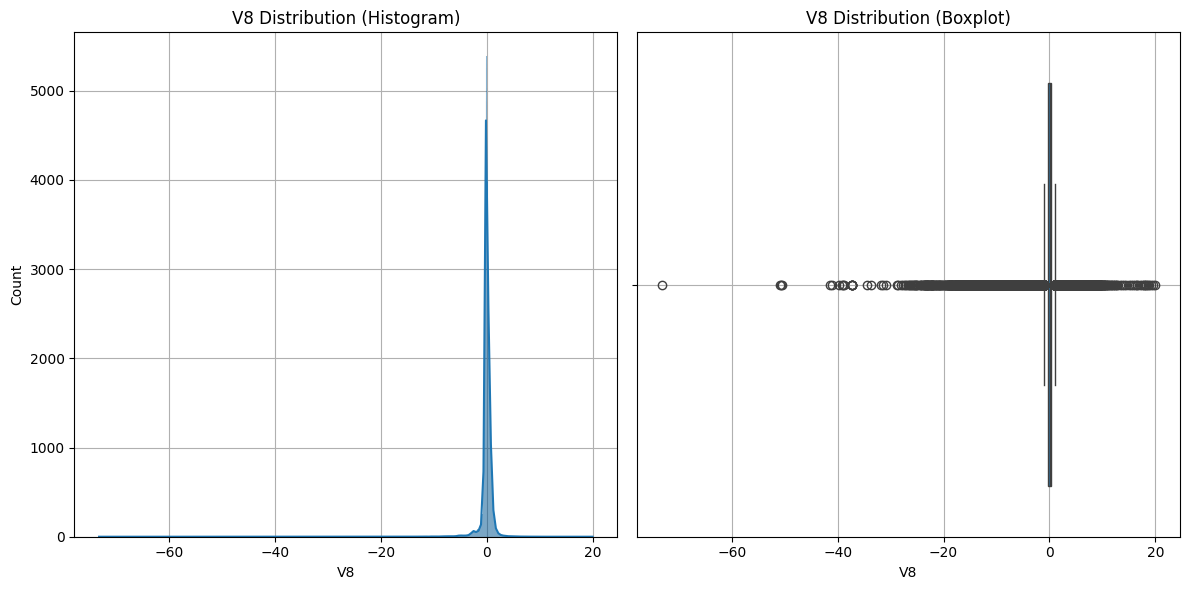

In [14]:
distribution_check('V8')

### Check the Distribution of V9

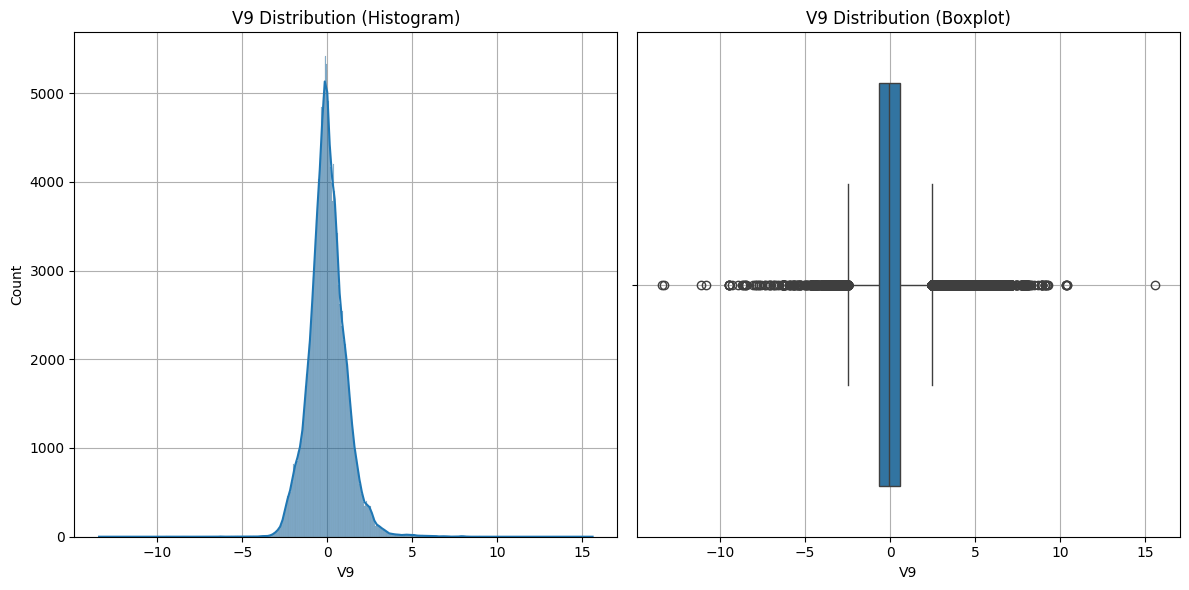

In [15]:
distribution_check('V9')

### Check the Distribution of V10

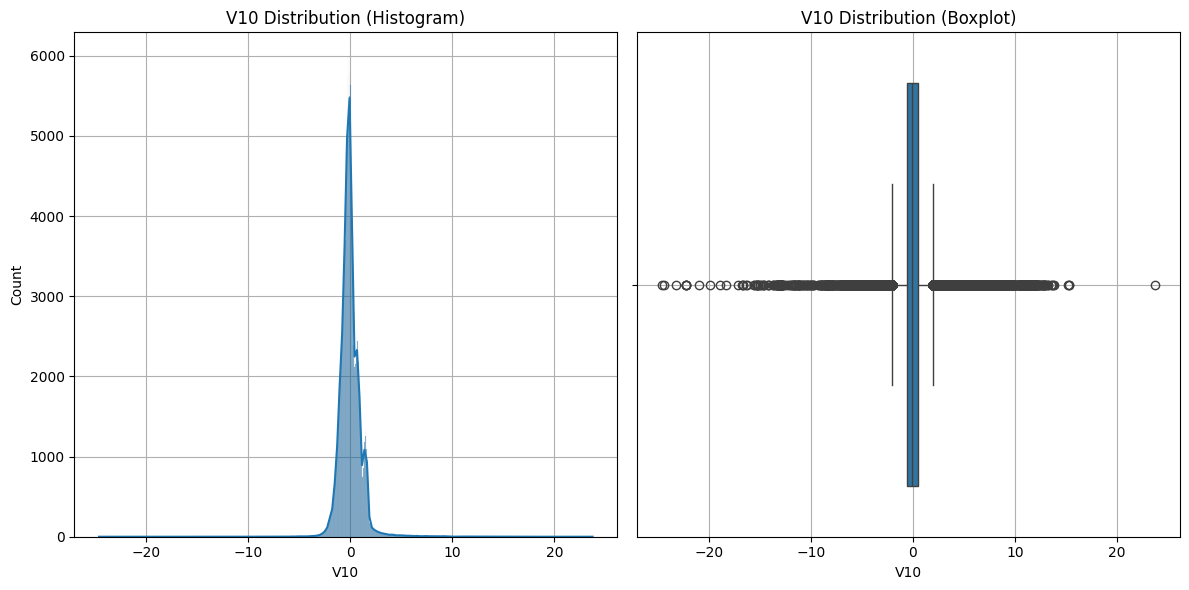

In [16]:
distribution_check('V10')

###  Check the Distribtion of V11

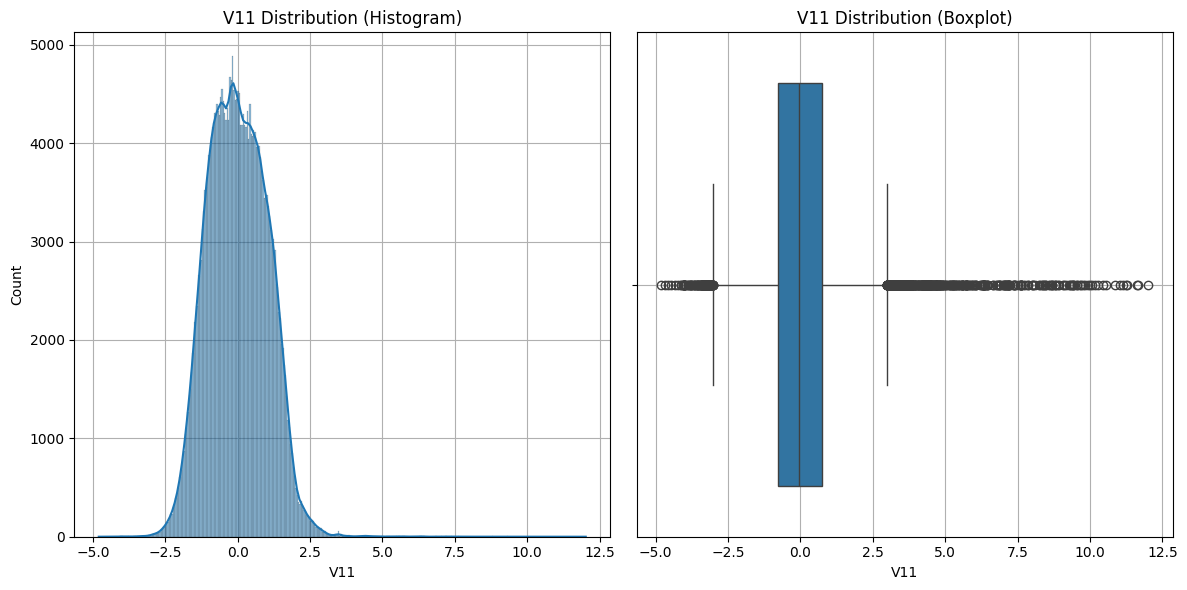

In [17]:
distribution_check('V11')

### Check the Distribution of V12

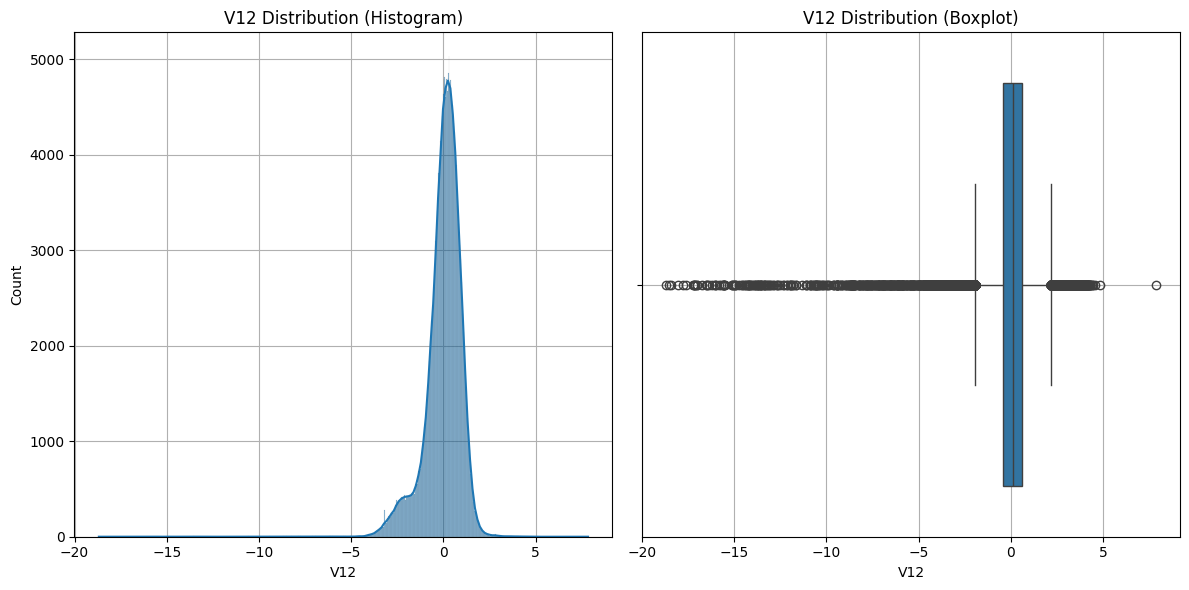

In [18]:
distribution_check('V12')

### Check the Distribution of V13

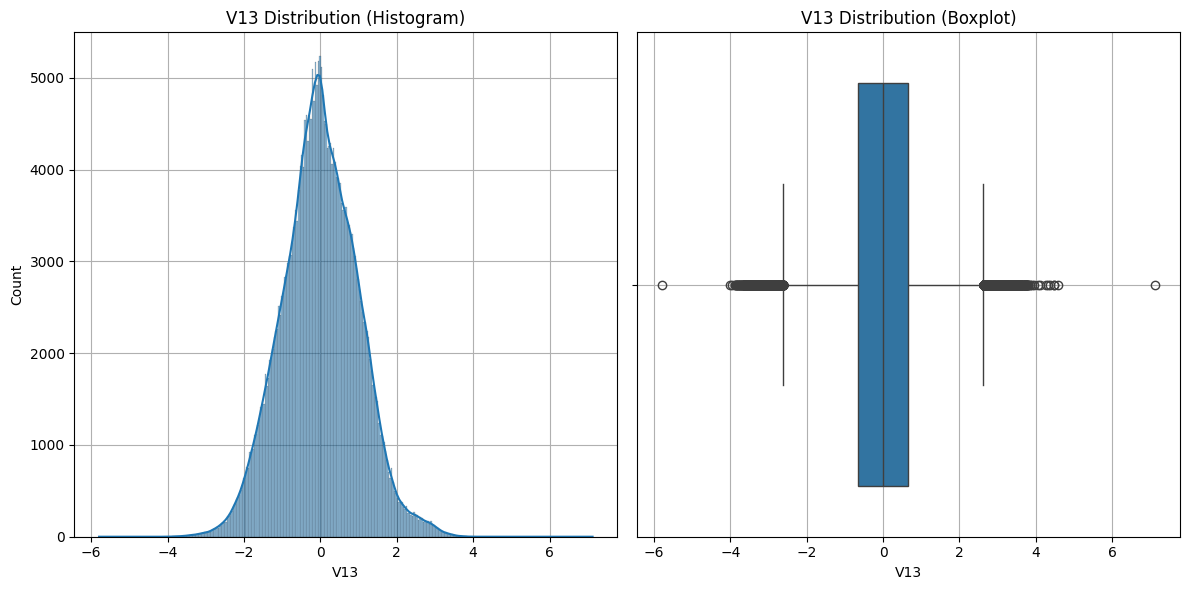

In [19]:
distribution_check('V13')

### Check the Distribution of V14

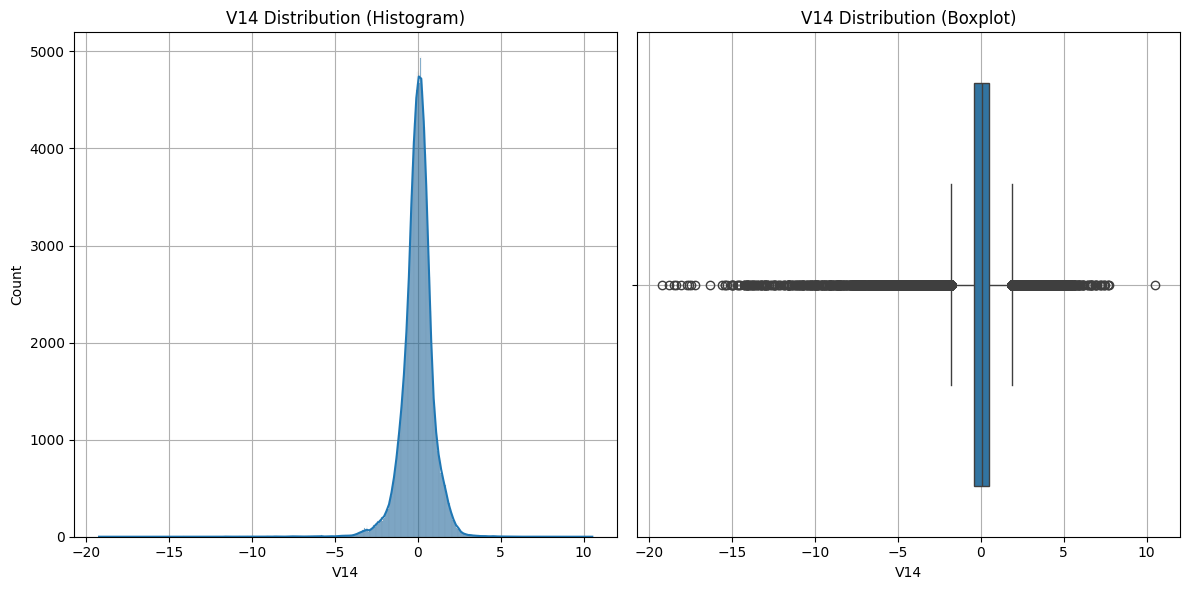

In [20]:
distribution_check('V14')

### Check the Distribution of V15

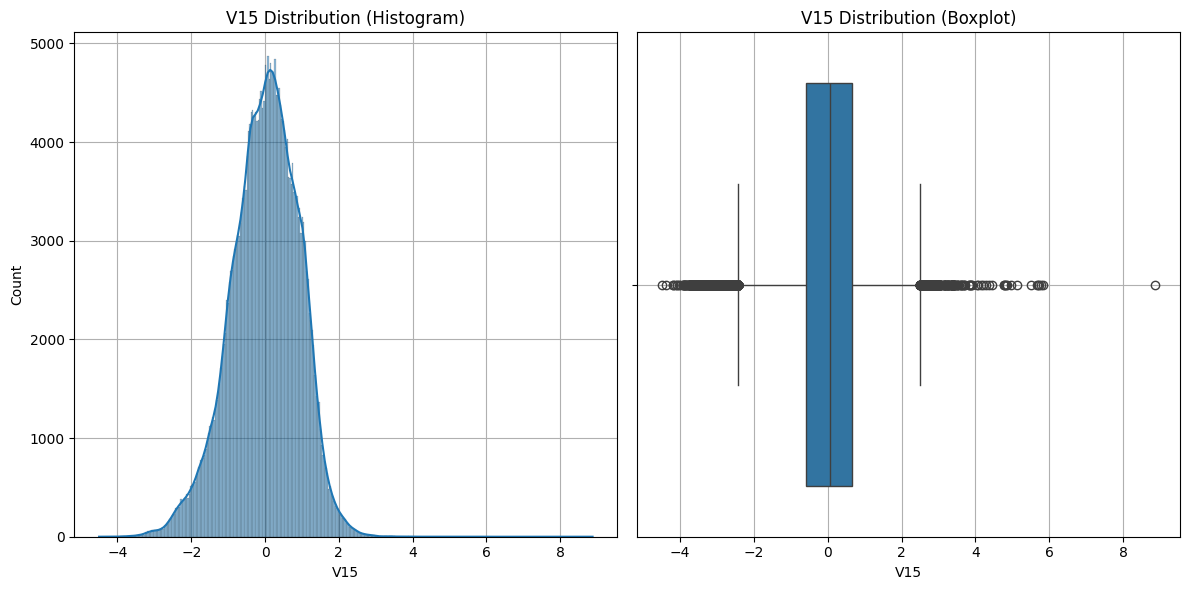

In [21]:
distribution_check('V15')

### Check the Distribution of V16

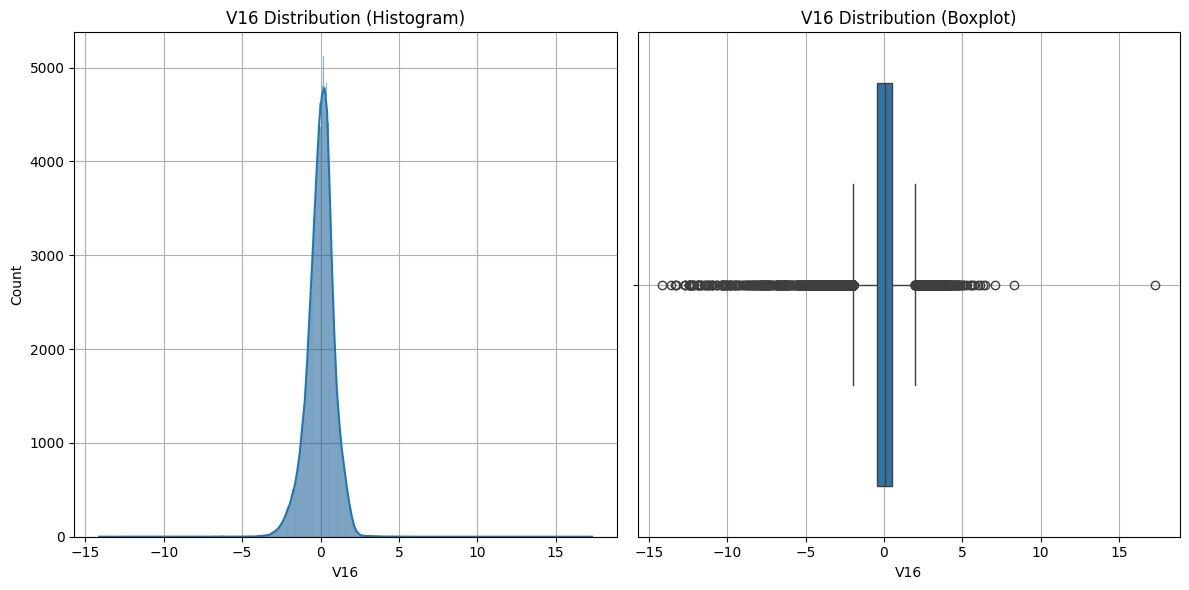

In [22]:
distribution_check('V16')

### Check the Distribution of V17

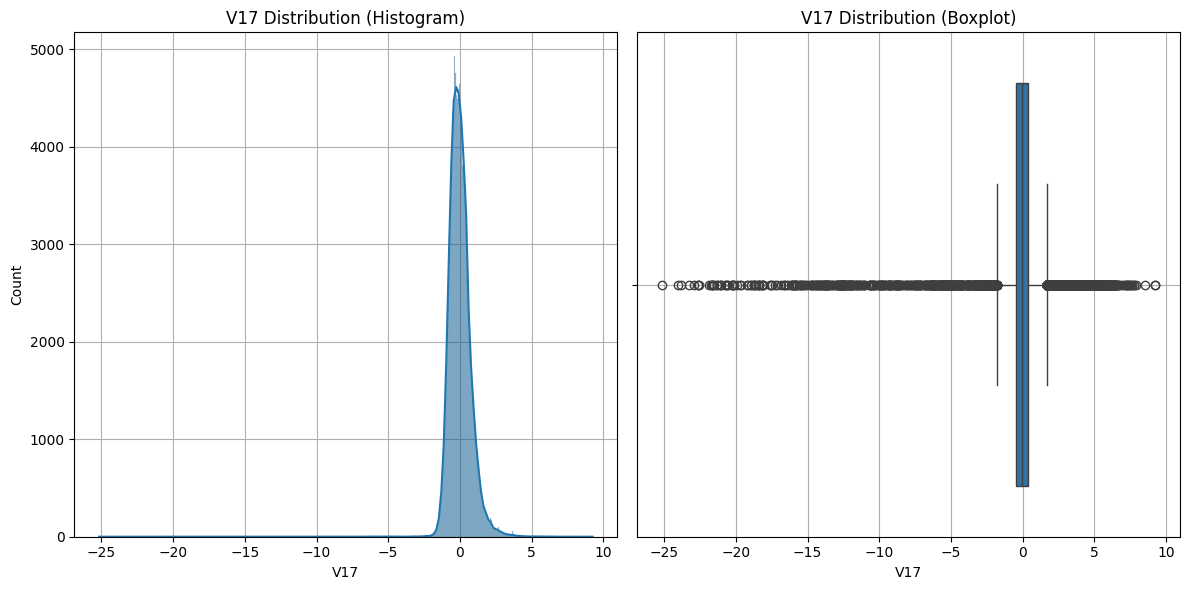

In [23]:
distribution_check('V17')

### Check the Distribution of V18

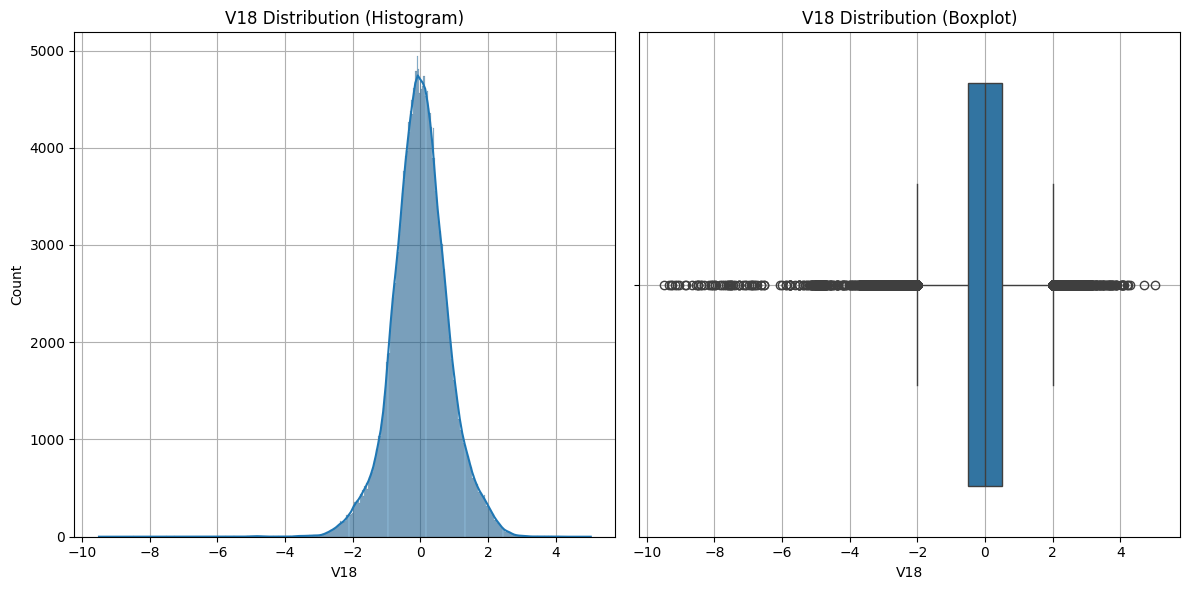

In [24]:
distribution_check('V18')

### Check the Distribution of V19

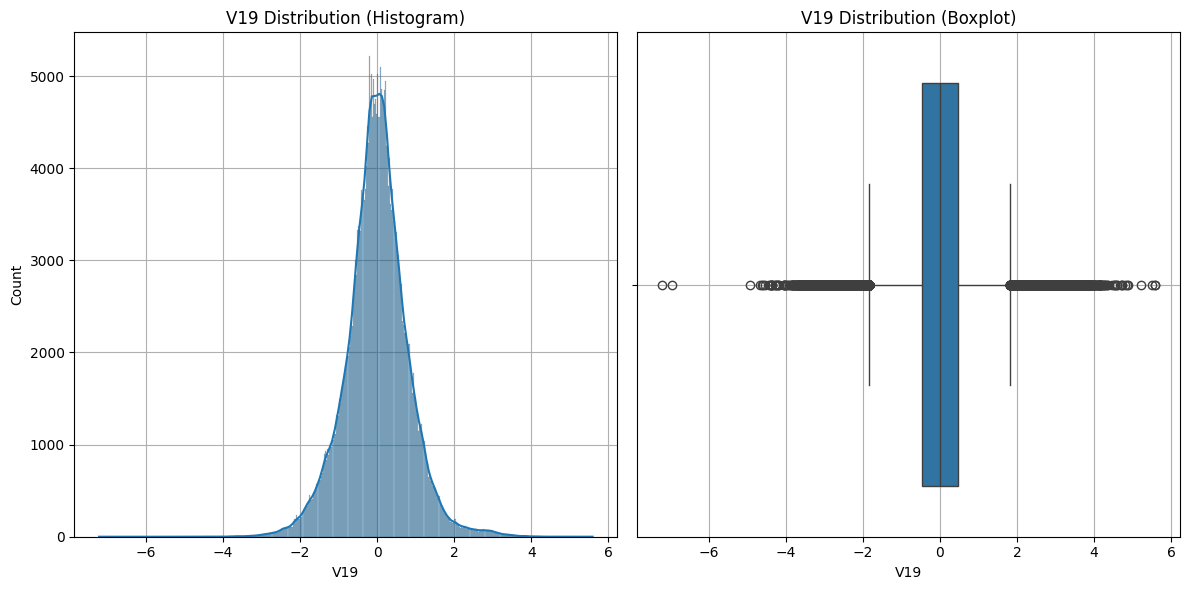

In [25]:
distribution_check('V19')

### Check the Distribution of V20

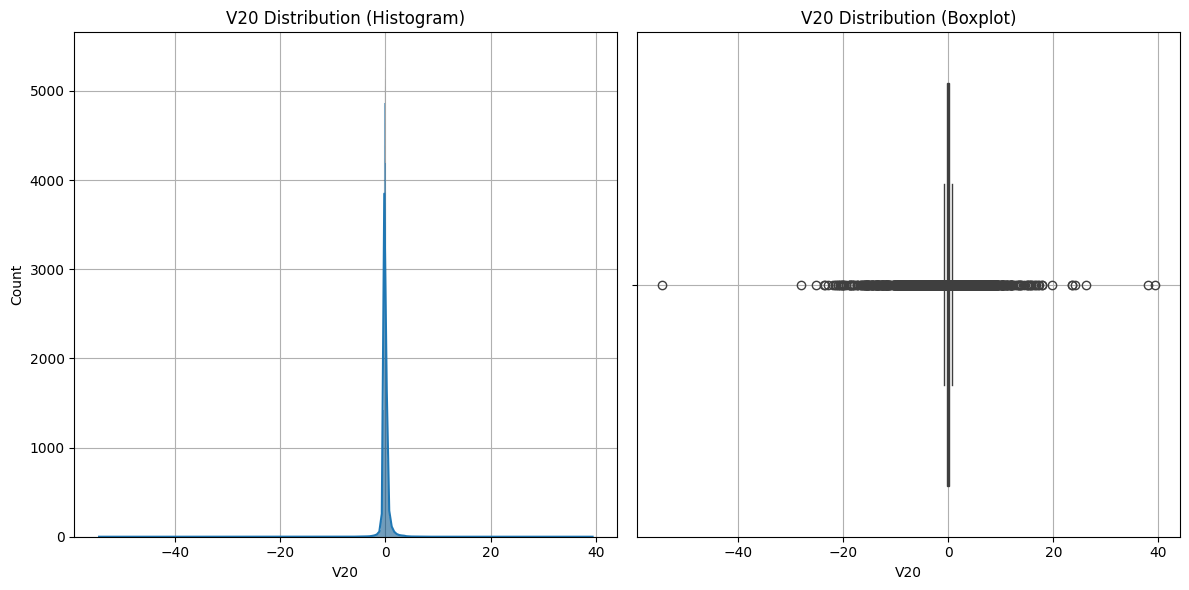

In [26]:
distribution_check('V20')

### Check the Distribution of V21

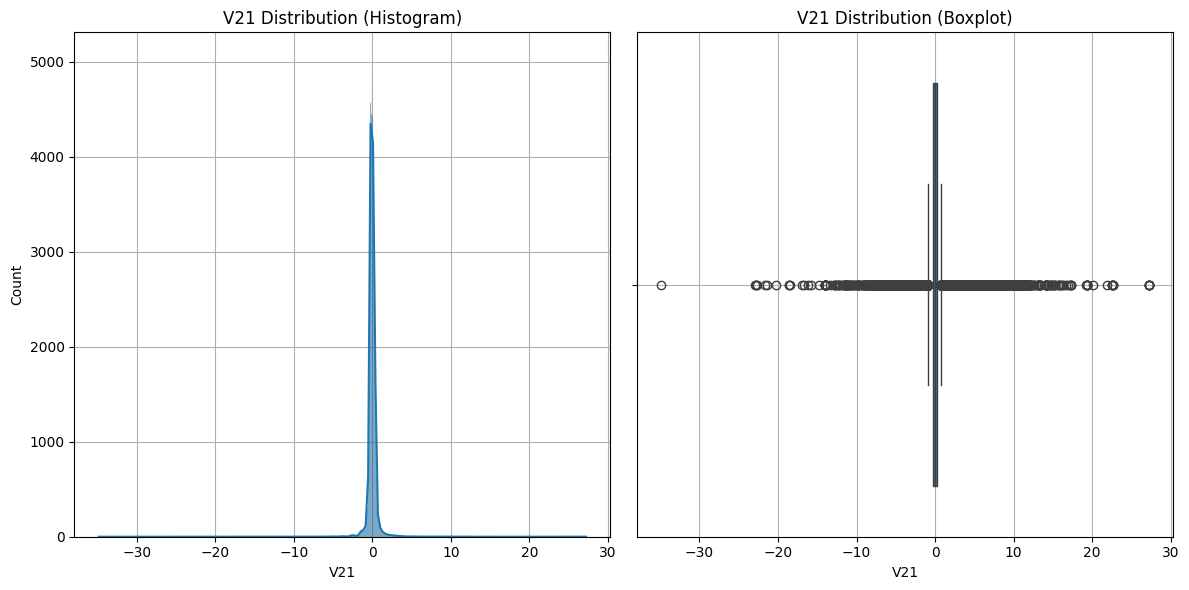

In [27]:
distribution_check('V21')

### Check the Distribution of V22

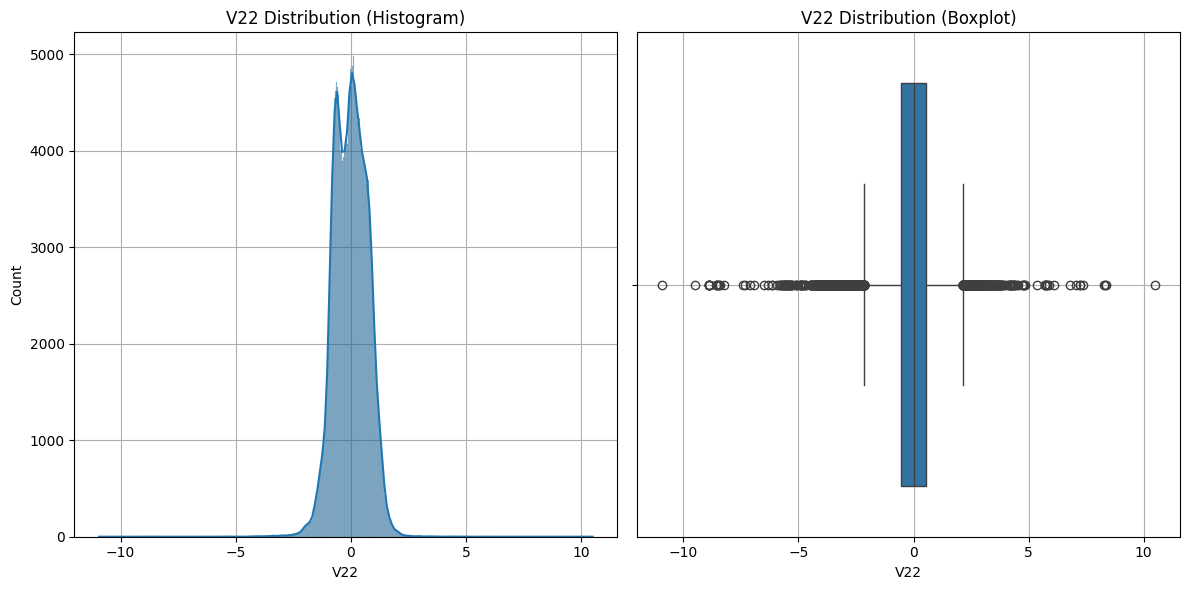

In [28]:
distribution_check('V22')

### Check the Distribution of V23

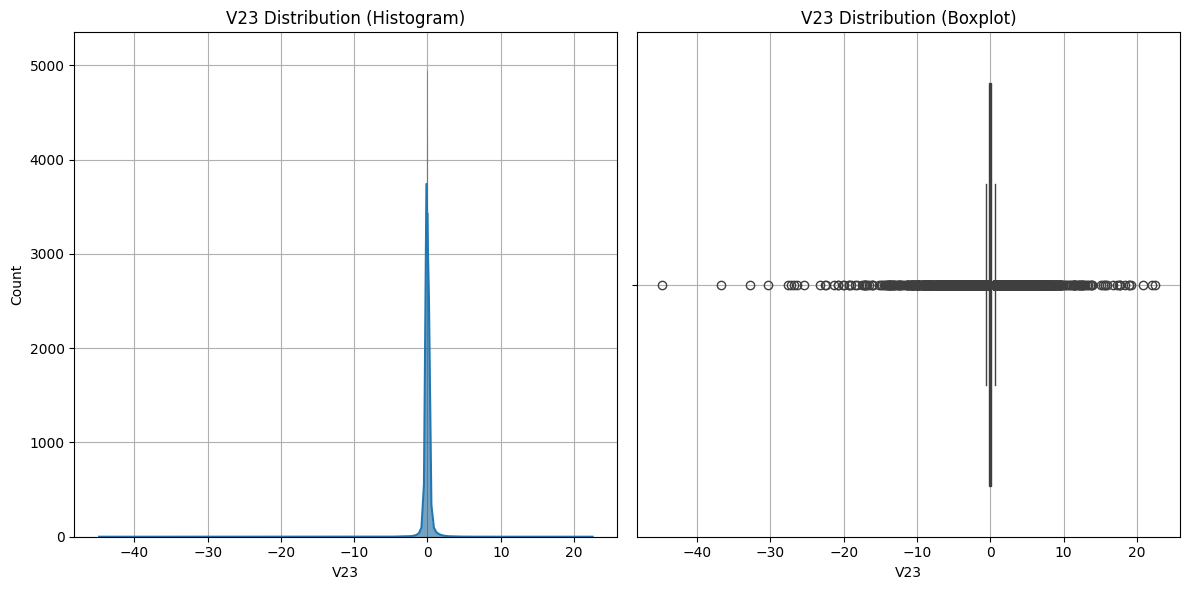

In [29]:
distribution_check('V23')

### Check the Distribution of V24

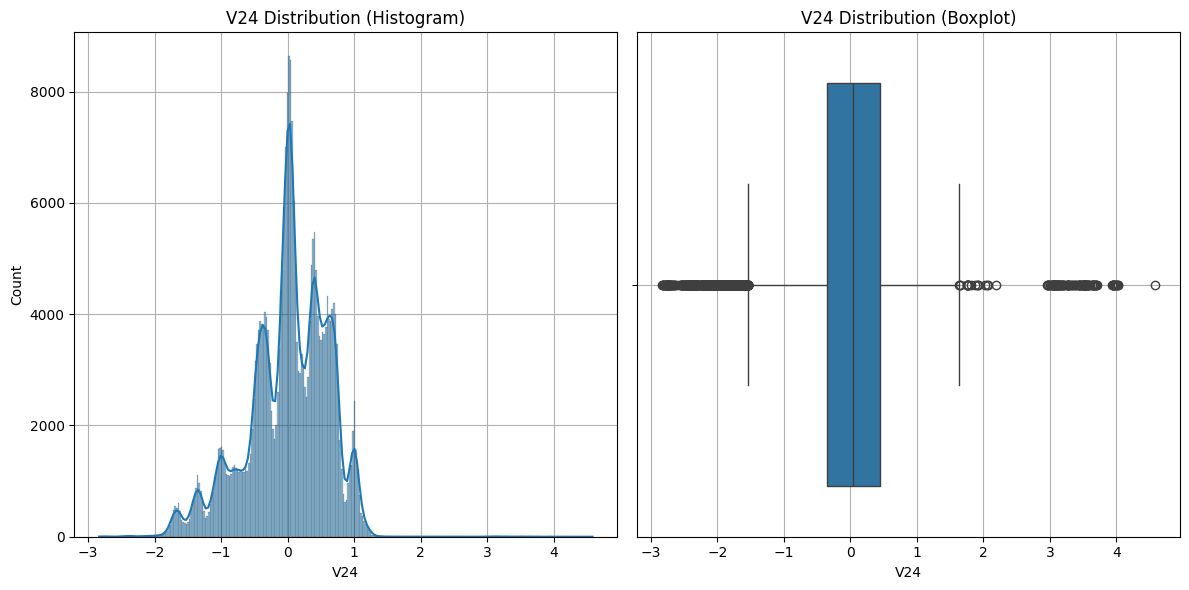

In [30]:
distribution_check('V24')

### Check the Distribution of V25

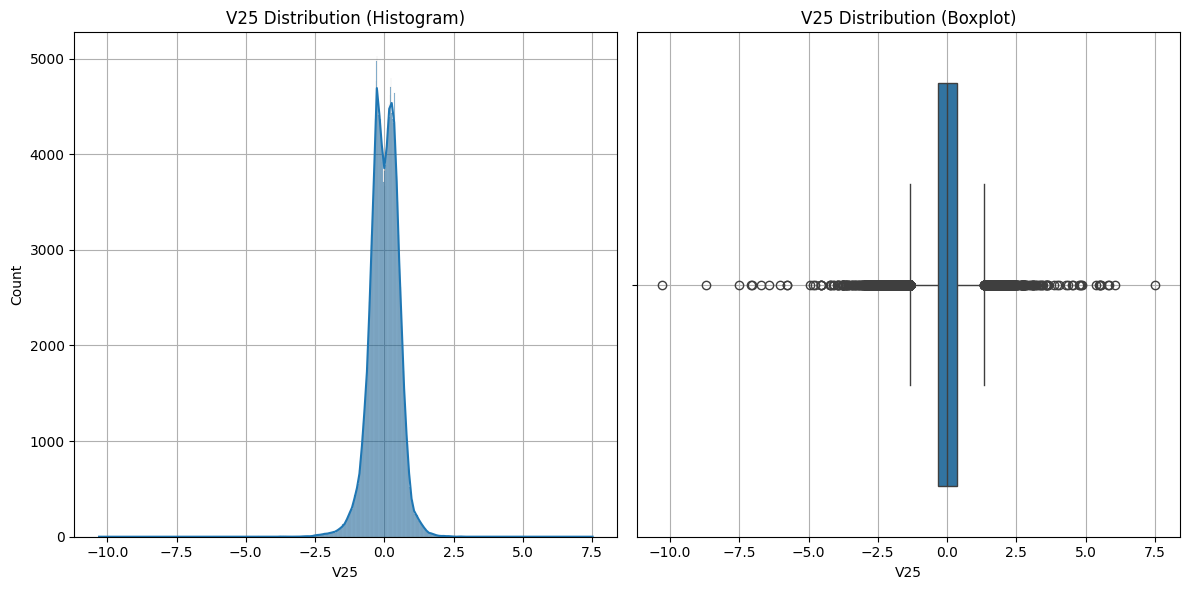

In [31]:
distribution_check('V25')

### Check the Distribution of V26

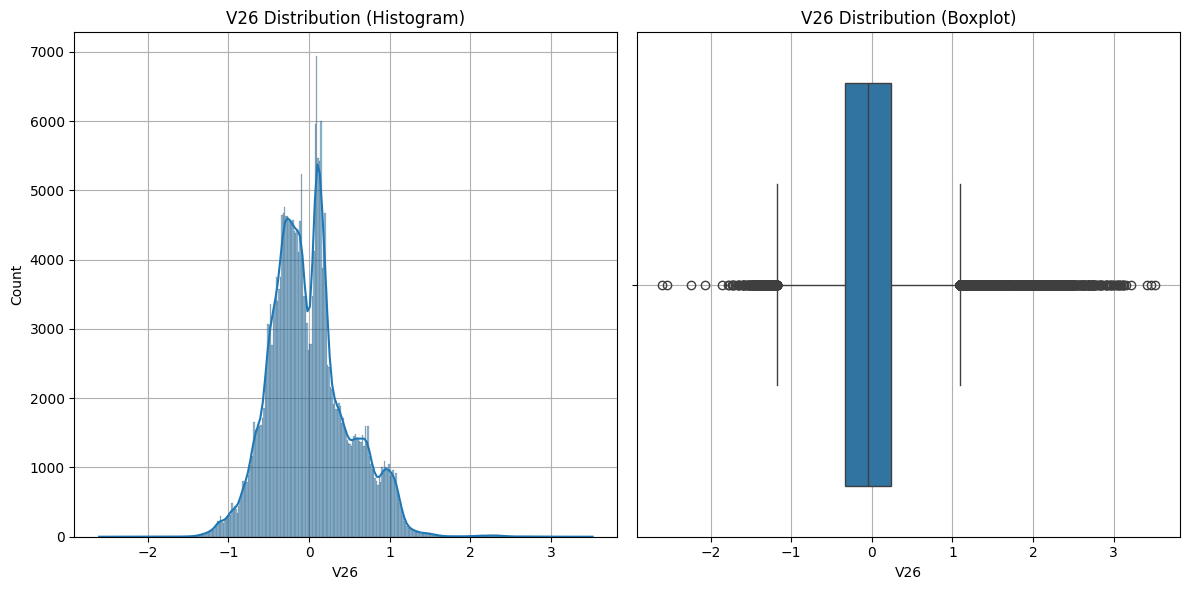

In [32]:
distribution_check('V26')

### Check the Distribution of V27

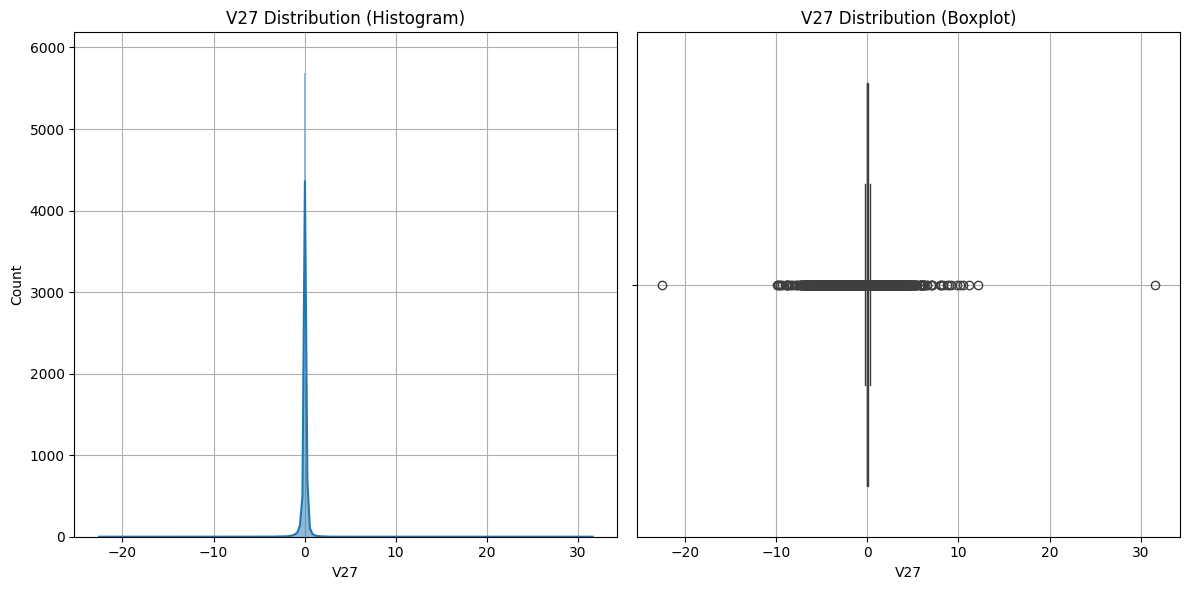

In [33]:
distribution_check('V27')

### Check the Distribution of V28

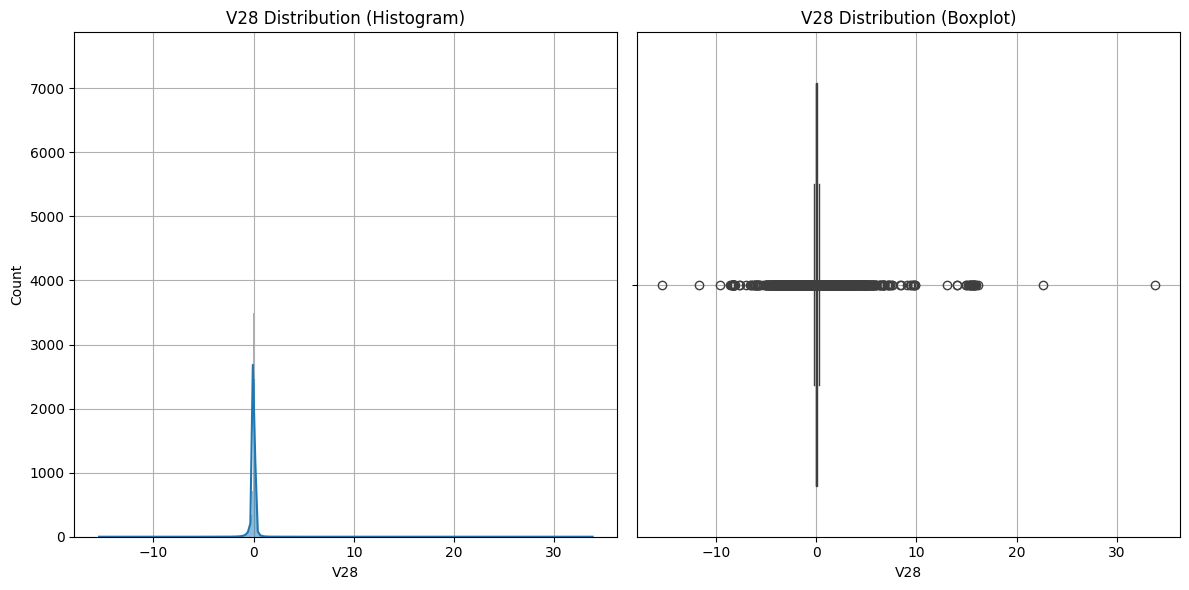

In [34]:
distribution_check('V28')

### Check the Distribution of Time

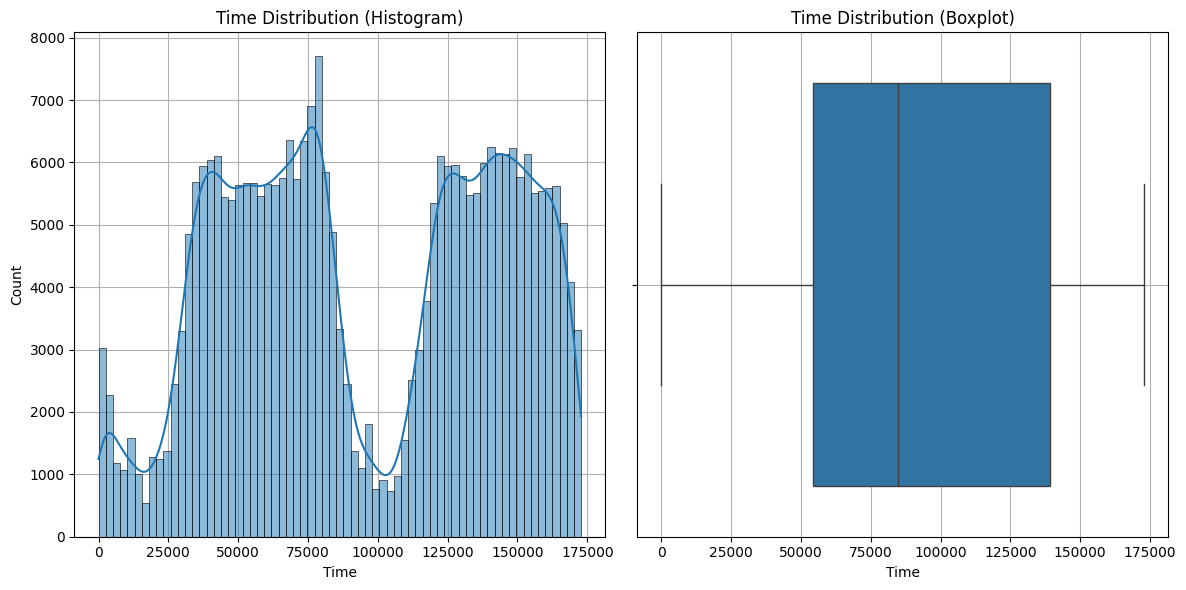

In [35]:
distribution_check('Time')

### Check the Distribution of Amount

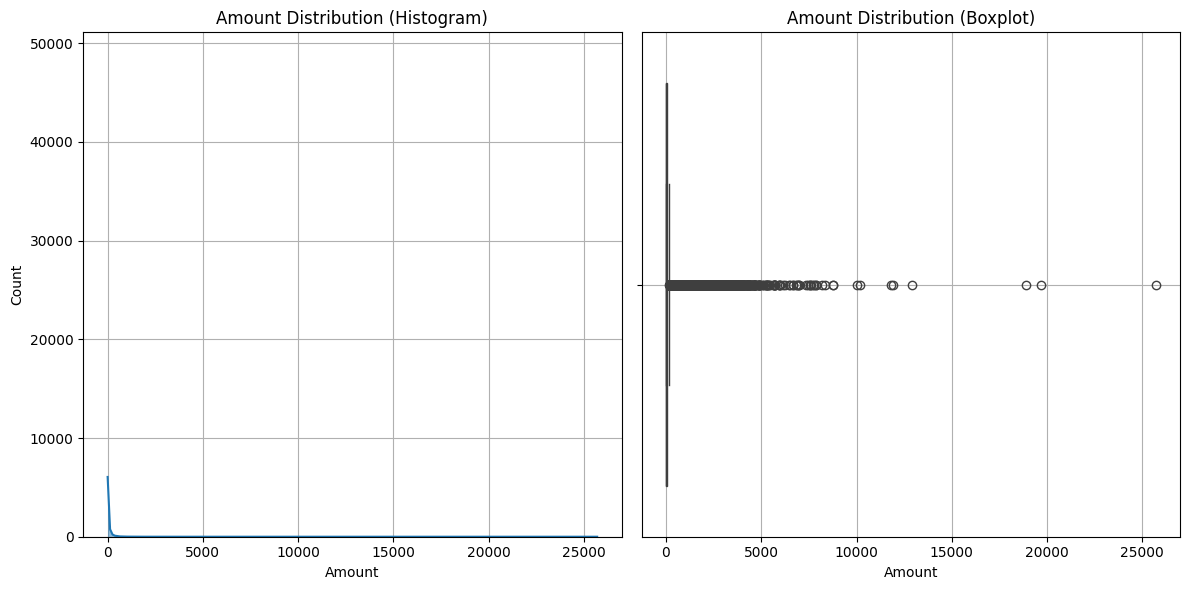

In [36]:
distribution_check('Amount')

## Check the Distribution of the Target (Class)

Let's check the distribution of the target

In [37]:
# The actual values
print('The number of rows with 0 label (classified as non-fraud):', df['Class'].value_counts()[0])
print('The number of rows with 1 label (classified as fraud):', df['Class'].value_counts()[1])
print()

# The values in percentage
print('The proportion of data classified as non-fraud (0):', round(df['Class'].value_counts()[0]/len(df) * 100, 2))
print('The proportion of data classified as fraud (1):', round(df['Class'].value_counts()[1]/len(df) * 100, 2))

The number of rows with 0 label (classified as non-fraud): 284315
The number of rows with 1 label (classified as fraud): 492

The proportion of data classified as non-fraud (0): 99.83
The proportion of data classified as fraud (1): 0.17


C:\Users\Joshia\AppData\Local\Temp\ipykernel_11392\1632482713.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=['darkslategrey','Forestgreen'], ax=axs[0])


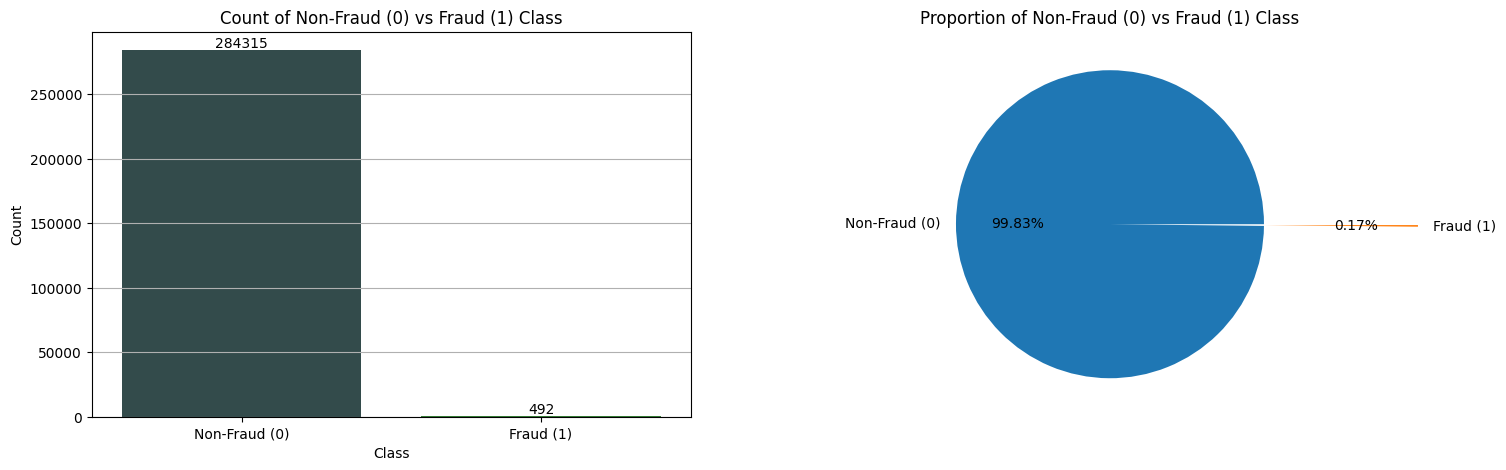

In [38]:
# Visualize
x = df['Class'].value_counts().index
y = df['Class'].value_counts().values

# Prepare the template
fig, axs = plt.subplots(nrows=1, ncols=2, gridspec_kw={'width_ratios':[1,1]}, figsize=(17,5))

# Countplot
sns.barplot(x=x, y=y, palette=['darkslategrey','Forestgreen'], ax=axs[0])
for i, v in enumerate(y):
    axs[0].text(i, v+1, str(v), ha='center', va='bottom')
axs[0].set_title('Count of Non-Fraud (0) vs Fraud (1) Class')
axs[0].set_xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
axs[0].set_ylabel('Count')
axs[0].yaxis.grid(True)

# Pie chart
axs[1].pie(x=y, labels=['Non-Fraud (0)', 'Fraud (1)'], explode=[0,1], autopct='%1.2f%%')
axs[1].set_title('Proportion of Non-Fraud (0) vs Fraud (1) Class')

plt.show()

## Scale the Time and Amount Features

In [45]:
# Using the RobustScaler, as it's evident that the Time and Amount features are significantly skewed
robsust_scaler = RobustScaler()

df['scaled_time'] = robsust_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amount'] = robsust_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [49]:
# Check the summary statistics of the original Time and scaled Time features
df[['Time','scaled_time']].describe()

,Time,scaled_time
count,284807.000000,284807.000000
mean,94813.859575,0.118914
std,47488.145955,0.557903
min,0.000000,-0.994983
25%,54201.500000,-0.358210
50%,84692.000000,0.000000
75%,139320.500000,0.641790
max,172792.000000,1.035022


In [50]:
# Check the summary statistics of the original Amount and scaled amount Features
df[['Amount','scaled_amount']].describe()

,Amount,scaled_amount
count,284807.000000,284807.000000
mean,88.349619,0.927124
std,250.120109,3.495006
min,0.000000,-0.307413
25%,5.600000,-0.229162
50%,22.000000,0.000000
75%,77.165000,0.770838
max,25691.160000,358.683155


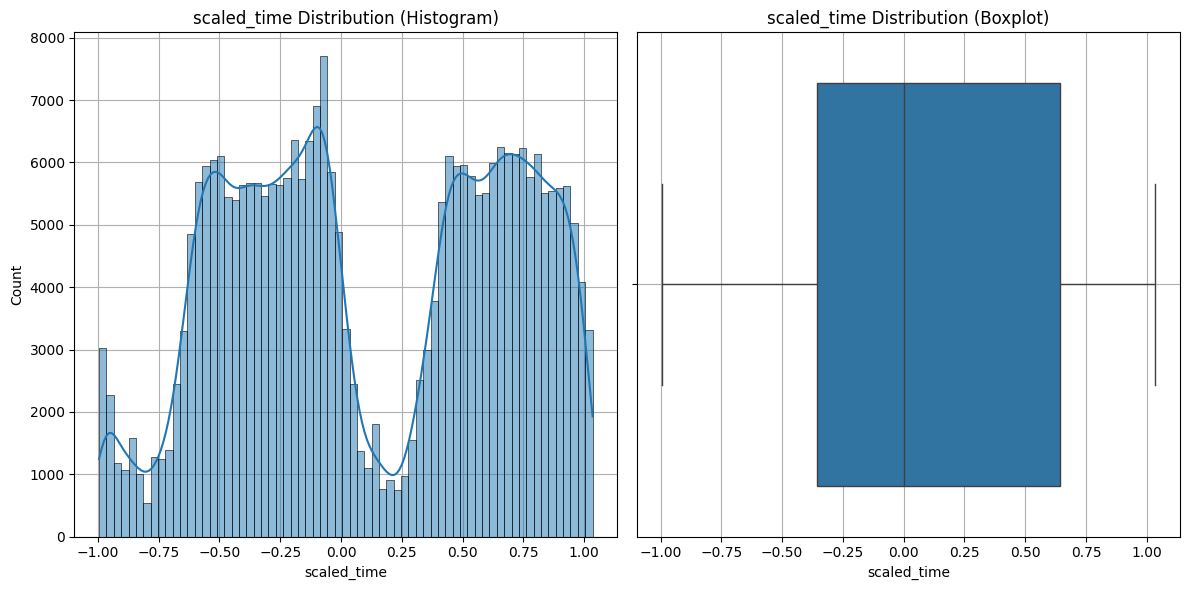

In [51]:
# Check the distribution of scaled time and scaled amount
distribution_check('scaled_time')

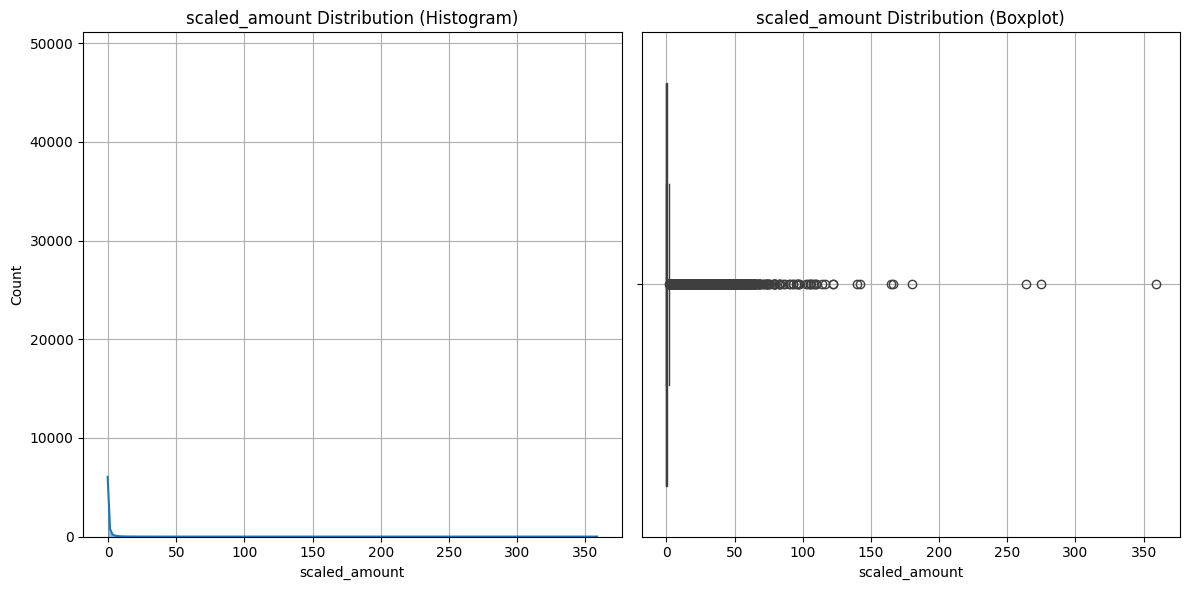

In [53]:
distribution_check('scaled_amount')

The distribution remained unchanged, because the RobustScaler only transform the scale of the feature's values to reduce the influence of outliers